# Customer Segmentation using KMeans

In [26]:
# Data handling and manipulation
import pandas as pd

# Data visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning algorithms and tools
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [27]:
# Load cleaned dataset

df = pd.read_csv("df_clustering.csv")

In [28]:
# Filter active customers
active_customers = df['Attrition_Flag'] == 'Existing Customer'
df_active = df[active_customers].copy()

# Save client IDs for later merging
client_ids_active = df_active[['CLIENTNUM']].copy()

# Drop identifiers for clustering
data_for_clustering = df_active.drop(columns=['CLIENTNUM', 'Attrition_Flag'])

In [29]:
data_for_clustering.head()

,Customer_Age,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,-0.165406,0.503368,0.763943,-1.327136,0.492404,0.446622,-0.473422,2.623494,-0.973895,3.834003,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.333570,2.043199,1.407306,-1.327136,-0.411616,-0.041367,-0.366667,3.563293,-1.357340,12.608573,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.583058,0.503368,0.120579,-1.327136,-2.219655,-0.573698,-1.426858,8.367214,-1.911206,6.807864,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.789126,1.273283,-0.522785,1.641478,-1.315636,-0.585251,1.661686,2.942843,-1.911206,6.807864,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,-0.789126,0.503368,0.763943,-1.327136,-2.219655,-0.430877,-1.426858,6.455682,-1.570365,7.509325,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### PCA for 2D Visualization

PCA is used to reduce the dataset to 2 components for visualization only. Clustering will still be applied on the full dataset.

In [30]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(data_for_clustering)

# Store PCA results
pca_df = pd.DataFrame(pca_components, columns=['PC1', 'PC2'])

In [31]:
pca_df.head()

,PC1,PC2
0,-0.542874,-3.493673
1,1.092020,-5.758586
2,0.287014,-5.981691
3,3.050938,-2.649695
4,0.122508,-5.551676


### Find Optimal Number of Clusters

In [32]:
inertia = []
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_for_clustering)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_for_clustering, labels))

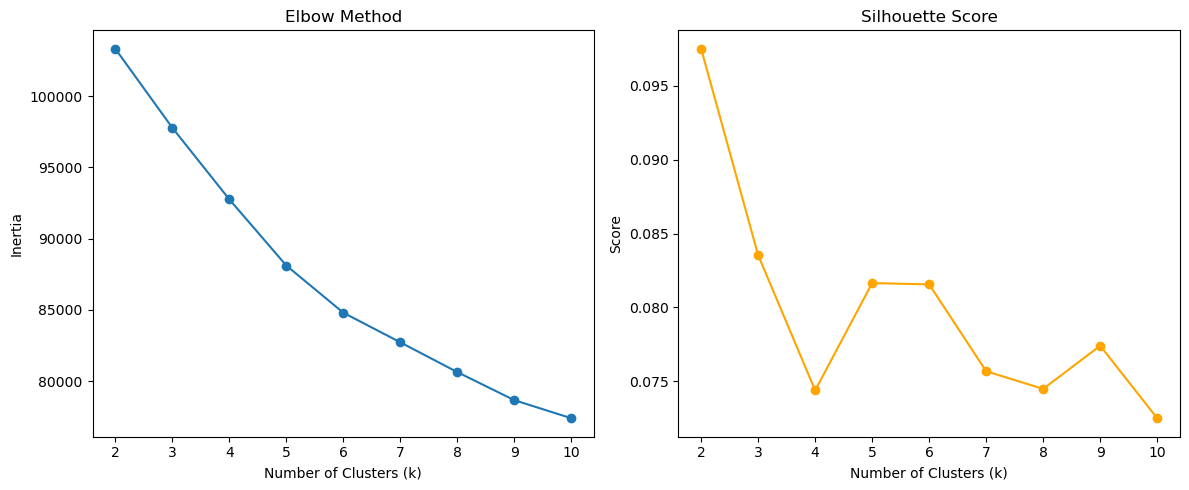

In [33]:
# Plot Elbow and Silhouette
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')

plt.tight_layout()
plt.show()

The data in the Elbow method is unclear, so the Silhouette score was used to make the decision. Although the data shows that k=2 is more optimal, in this case k=3 was chosen to have more diversity in clusters.

### Train KMeans and Assign Labels

In [34]:
# Train KMeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(data_for_clustering)

# Assign cluster labels
df_active['Cluster'] = cluster_labels

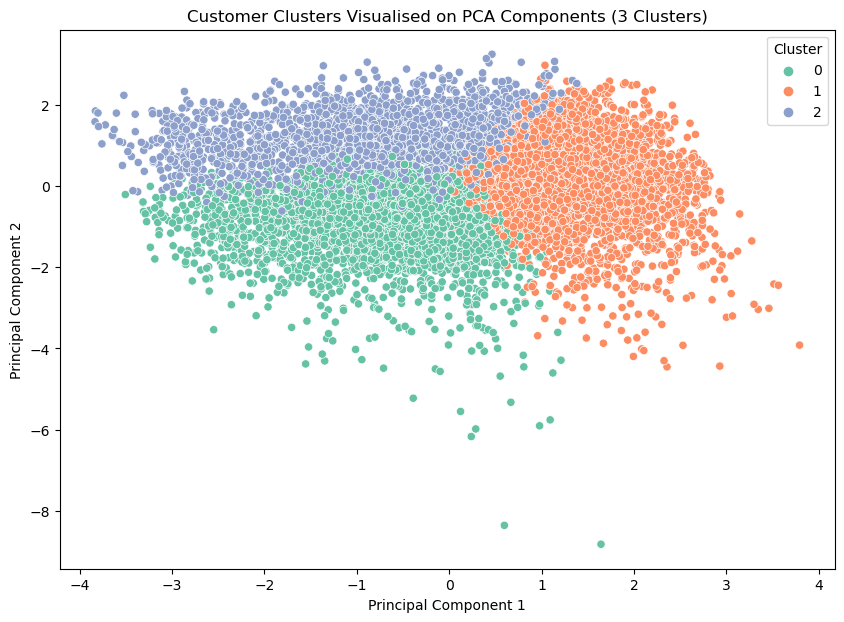

In [35]:
# Prepare visualization DataFrame
visualisation_pca_df = pca_df.copy()
visualisation_pca_df['Cluster'] = cluster_labels

# Scatterplot
plt.figure(figsize=(10, 7))
sns.scatterplot(data=visualisation_pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set2')
plt.title('Customer Clusters Visualised on PCA Components (3 Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

### Merge Clusters with Original Dataset

In [39]:
# Load original dataset

df_original = pd.read_csv("C:/Users/matia/Desktop/NCI/Semestre 2/Final Project/credit_card_churn.csv")

# Filter active customers
df_original_active = df_original[df_original['Attrition_Flag'] == 'Existing Customer'].copy()

In [40]:
# Merge clusters
df_original_active = df_original_active.merge(df_active[['CLIENTNUM', 'Cluster']], on='CLIENTNUM', how='left')

In [41]:
# Drop Naive Bayes columns
df_original_active = df_original_active.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

### Segment Analysis - Demographics

In [45]:
# Age and dependents
df_original_active.groupby('Cluster')[['Customer_Age', 'Dependent_count']].agg(['mean', 'std']).round(2)

Customer_Age       Dependent_count      
                mean   std            mean   std
Cluster                                         
0              46.32  8.10            2.32  1.29
1              46.53  8.56            2.23  1.32
2              45.69  7.10            2.55  1.28

Average ages are similar (45-46 years) and the number of dependents varies little, although Cluster 2 has slightly more. This indicates little demographic differentiation

In [46]:
# Gender
gender_dist = df_original_active.groupby(['Cluster', 'Gender']).size().unstack().fillna(0)
gender_dist_pct = gender_dist.div(gender_dist.sum(axis=1), axis=0).round(2)
gender_dist_pct

Gender,F,M
Cluster,,
0,0.35,0.65
1,0.73,0.27
2,0.44,0.56


Cluster 0: Majority women (65%). Cluster 1: Majority male (73%). Cluster 2: Balanced, slight majority female (56%).

In [15]:
# Educational level
edu_dist = df_original_active.groupby(['Cluster', 'Education_Level']).size().unstack().fillna(0)
edu_dist_pct = edu_dist.div(edu_dist.sum(axis=1), axis=0).round(2)
edu_dist_pct

Education_Level,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,Unknown
Cluster,,,,,,,
0,0.10,0.04,0.31,0.20,0.05,0.15,0.15
1,0.10,0.04,0.31,0.21,0.05,0.14,0.15
2,0.11,0.04,0.31,0.20,0.05,0.14,0.15


Similar distributions in the three clusters. Graduate and High School predominate with little representation of higher levels.

In [16]:
# Marital status
marital_dist = df_original_active.groupby(['Cluster', 'Marital_Status']).size().unstack().fillna(0)
marital_dist_pct = marital_dist.div(marital_dist.sum(axis=1), axis=0).round(2)
marital_dist_pct

Marital_Status,Divorced,Married,Single,Unknown
Cluster,,,,
0,0.08,0.46,0.39,0.07
1,0.07,0.50,0.36,0.07
2,0.08,0.42,0.42,0.08


Similar distribution in the clusters mostly married or single with few divorced.

In [17]:
# Income
income_dist = df_original_active.groupby(['Cluster', 'Income_Category']).size().unstack().fillna(0)
income_dist_pct = income_dist.div(income_dist.sum(axis=1), axis=0).round(2)
income_dist_pct

Income_Category,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Unknown
Cluster,,,,,,
0,0.11,0.15,0.19,0.23,0.19,0.12
1,0.02,0.21,0.08,0.06,0.54,0.09
2,0.10,0.18,0.16,0.18,0.26,0.12


Cluster 1: Mainly low income (less 40K).  Cluster 0: Balanced income mix.  Cluster 2: More presence in middle and high income.

### Segment Analysis - Banking and Financial Behaviour

In [47]:
# Banking activity
df_original_active.groupby('Cluster')[['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon']].agg(['mean', 'std']).round(2)

Months_on_book       Total_Relationship_Count        \
                  mean   std                     mean   std   
Cluster                                                       
0                36.00  7.96                     4.63  1.11   
1                35.95  8.43                     4.21  1.37   
2                35.55  7.36                     2.18  0.99   

        Months_Inactive_12_mon       Contacts_Count_12_mon        
                          mean   std                  mean   std  
Cluster                                                           
0                         2.28  1.00                  2.57  1.12  
1                         2.32  1.05                  2.35  1.07  
2                         2.18  0.98                  2.00  0.94

Cluster 0: More products and contacts with the bank. Cluster 1: Similar to 0 but fewer products and contacts. Cluster 2: Less products and contact.

In [48]:
# Financial profile
df_original_active.groupby('Cluster')[['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Avg_Utilization_Ratio']].agg(['mean', 'std']).round(2)

Credit_Limit           Total_Revolving_Bal         Avg_Open_To_Buy  \
                mean       std                mean     std            mean   
Cluster                                                                      
0           12082.73   9641.02              865.60  767.87        11217.12   
1            3147.14   1548.23             1667.43  496.45         1479.71   
2           12760.94  10727.44             1205.31  750.13        11555.63   

                  Avg_Utilization_Ratio        
              std                  mean   std  
Cluster                                        
0         9377.87                  0.09  0.09  
1         1374.24                  0.58  0.18  
2        10547.55                  0.16  0.15

Cluster 0: High credit limit, low revolving balance, low utilisation. Cluster 1: Low credit limit, high revolving balance, high utilisation (58%).   Cluster 2: High credit limit, moderate balance and medium utilisation.

In [49]:
# Transactions
df_original_active.groupby('Cluster')[['Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1']].agg(['mean', 'std']).round(2)

Total_Trans_Amt          Total_Trans_Ct        Total_Amt_Chng_Q4_Q1  \
                   mean      std           mean    std                 mean   
Cluster                                                                       
0               3144.49  1648.52          58.54  18.98                 0.78   
1               3744.71  1895.91          64.81  19.28                 0.78   
2               8825.40  4619.62          92.73  17.19                 0.74   

              Total_Ct_Chng_Q4_Q1        
          std                mean   std  
Cluster                                  
0        0.25                0.74  0.26  
1        0.22                0.76  0.24  
2        0.13                0.73  0.13

Cluster 0: Moderate volume and stability in amounts and quantity.  Cluster 1: Slightly higher volume and slightly higher activity. Cluster 2: Much higher volume and amount of transactions.

In [50]:
# Card category
card_dist = df_original_active.groupby(['Cluster', 'Card_Category']).size().unstack().fillna(0)
card_dist_pct = card_dist.div(card_dist.sum(axis=1), axis=0).round(2)
card_dist_pct

Card_Category,Blue,Gold,Platinum,Silver
Cluster,,,,
0,0.92,0.01,0.00,0.07
1,1.00,0.00,0.00,0.00
2,0.83,0.03,0.01,0.13


Cluster 0: Mostly Blue card 92%, some Silver. Cluster 1: Exclusively Blue card.   Cluster 2: Majority Blue 83% with more diversity (Silver, Gold, Platinum).

### Cluster Definition: Segmentation Analysis

The clusters show clear differences in financial and credit usage variables:

- (Cluster 0) Medium Income and Low Usage Customers: as they have middle income clients with several products and frequent contact with the bank. Moderate credit usage and medium volume transactions. Although there are more women gender does not define the segment.

- (Cluster 1) Low Income and High Usage Customers: as they have Low income clients limited but highly utilised credit. Key is their economic status and high credit usage indicating higher financial risk.

- (Cluster 2) Medium-High Income and Active Usage Customers: Upper middle income customers with less bank contact but high volume and frequency of transactions. More card diversity. Active and varied use of credit.

### Save Cluster Labels

In [52]:
# Labelling clusters

df_clusters_labels = df_original_active[['CLIENTNUM']].copy()

In [53]:
df_clusters_labels['Cluster_Label'] = df_original_active['Cluster'].map({0: "Medium Income and Low Usage",1: "Low Income and High Usage",2: "Medium-High Income and Active Usage"})

In [54]:
# Export to CSV
df_clusters_labels.to_csv('clusters_labels.csv', index=False)